<a href="https://colab.research.google.com/github/bs3537/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

#### 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#mean
list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
n = len(list)
list_sum = sum(list)
list_mean = list_sum/ n
list_mean


3052.714285714286

In [0]:
#variance
import pandas as pd
data = (3505, 2400, 3027, 2798, 3700, 3250, 2689)

df = pd.DataFrame(data)
df.head(10)




,0
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [0]:
#distance of each observation from the mean
df_distance = df-list_mean
df_distance

,0
0,452.285714
1,-652.714286
2,-25.714286
3,-254.714286
4,647.285714
5,197.285714
6,-363.714286


In [0]:
#square root of the distance from mean
df_dist_sq = (df_distance)**2
df_dist_sq.head(10)

,0
0,204562.367347
1,426035.938776
2,661.224490
3,64879.367347
4,418978.795918
5,38921.653061
6,132288.081633


In [0]:
# sum the squared distances from mean and divide by number of observations
n_observations = len(df_dist_sq)
n_observations

7

In [0]:
variance = df_dist_sq.sum()/n_observations
print ("variance=", variance)

variance= 0    183761.061224
dtype: float64


In [0]:
#standard deviation is square root of variance
import math
std_dev = math.sqrt(variance)
std_dev


428.67360686714756

In [0]:
# check using numpy
std_sales = np.std(df)
std_sales

0    428.673607
dtype: float64

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = (127, 80, 105, 92, 120, 115, 93)
import numpy as np
covariance = np.cov(sales, customers, ddof=0)
covariance

array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

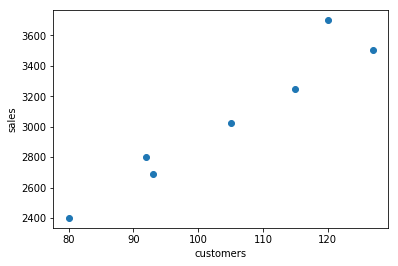

In [0]:
import matplotlib.pyplot as plt
plt.scatter(customers, sales)
plt.xlabel('customers')
plt.ylabel('sales')

plt.show()

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
std_custom = np.std(customers)
std_custom

15.792015549069118

In [0]:
customers = (127, 80, 105, 92, 120, 115, 93)
df2 = pd.DataFrame(customers)
df2.head(10)

,0
0,127
1,80
2,105
3,92
4,120
5,115
6,93


In [0]:
n2 = len(df2)
n2

7

In [0]:
custom_sum = sum(customers)
custom_sum

732

In [0]:
custom_mean = custom_sum/ n2
custom_mean

104.57142857142857

In [0]:
custom_distance = df2-custom_mean
custom_distance

,0
0,22.428571
1,-24.571429
2,0.428571
3,-12.571429
4,15.428571
5,10.428571
6,-11.571429


In [0]:
custom_dist_sq = (custom_distance)**2
custom_dist_sq

,0
0,503.040816
1,603.755102
2,0.183673
3,158.040816
4,238.040816
5,108.755102
6,133.897959


In [0]:
custom_observations = len(custom_dist_sq)
custom_observations

7

In [0]:
custom_variance = custom_dist_sq.sum()/custom_observations
custom_variance

0    249.387755
dtype: float64

In [0]:

custom_std_dev = math.sqrt(custom_variance)
custom_std_dev

15.792015549069118

In [0]:
# check using numpy
std_custom = np.std(df2)
std_custom

0    15.792016
dtype: float64

In [0]:
std_sales = np.std(sales)
std_sales

428.67360686714756

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
new_titanic = titanic.select_dtypes(include=[np.number])
new_titanic.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
new_titanic.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [0]:
new_titanic.dropna()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
3,4,1.0,0.0,30.000000,1.0,2.0,151.5500,135.0,1
9,10,1.0,0.0,71.000000,0.0,0.0,49.5042,22.0,0
10,11,1.0,0.0,47.000000,1.0,0.0,227.5250,124.0,1
25,26,1.0,0.0,25.000000,0.0,0.0,26.0000,148.0,0
39,40,1.0,0.0,48.000000,0.0,0.0,50.4958,208.0,1
60,61,1.0,0.0,36.000000,1.0,0.0,78.8500,172.0,1
81,82,1.0,0.0,70.000000,1.0,1.0,71.0000,269.0,1
96,97,1.0,0.0,50.000000,1.0,0.0,106.4250,62.0,1
101,102,1.0,0.0,39.000000,0.0,0.0,29.7000,133.0,1
128,129,1.0,0.0,47.000000,0.0,0.0,38.5000,275.0,1


In [0]:
#variance-covariance matrix
new_titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#correlation matrix showing correlation coefficients between different numeric columns
new_titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


## Orthogonality

### 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#Two vectors that are perpendicular to one another are orthogonal.
#Synonym for orthogonal is perpendicularity.


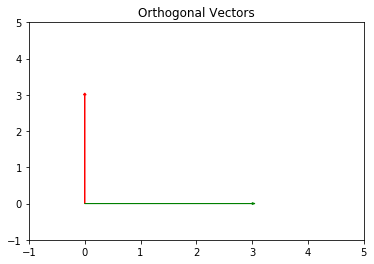

In [0]:
vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Let us find the dot product of these two matrices since the dot product of two orthogonal matrices is zero.

a= [(-5),
    (3),
    (7)]

b= [(6),
    (-8),
    (2)]
ab = np.dot(a, b)
ab


-40

In [0]:
# The vectors are not orthogonal as their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
pip install scipy

In [0]:
c = [(2), 
     (-15), 
     (6), 
     (20)]
#norm of vector c =   ||c||
#The Norm is the square root of the sum of the squared elements of a vector.
from scipy import linalg
c_norm = np.linalg.norm(c)
c_norm


25.787593916455254

In [0]:
#||c||2
c_sq = c_norm ** 2
c_sq

665.0

In [0]:
#c⋅c
c_c = np.dot(c, c)
c_c

665

In [0]:
#c transpose
c = [(2), 
     (-15), 
     (6), 
     (20)]
c_matrix = np.matrix(c)
c_matrix

matrix([[  2, -15,   6,  20]])

In [0]:
c_T = c_matrix.T
c_T

matrix([[  2],
        [-15],
        [  6],
        [ 20]])

In [0]:
#cTc
np.dot(c_matrix, c_T)

matrix([[665]])

In [0]:
#From the output above, all the three values are the same==665
# Thus ||c||2, c⋅c, and cT.c have the same value.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# A unit vector is a vector of unit length. 
# A non-zero vector can be normalized into its unit vector by dividing the vector by its norm.

f_vector = [(4), 
            (12), 
            (11),
            (9),
            (2)]
            
#norm of vector f =   ||f||
#The Norm is the square root of the sum of the squared elements of a vector.

f_norm = np.linalg.norm(f_vector)
f_norm

19.131126469708992

In [0]:
f_unit_vector = f_vector/f_norm
f_unit_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
#The unit vector of f is [0.21, 0.62, 0.57, 0.47, 0.10]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

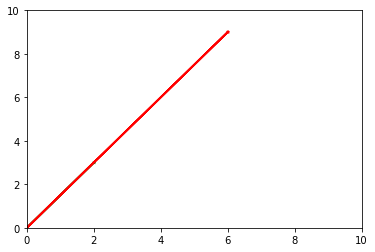

In [0]:
# Plotting two linearly dependent vectors

vector_a = [2, 3]
vector_b = [6, 9]

# Plot the vectors
plt.arrow(0,0, vector_a[0], vector_a[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vector_b[0], vector_b[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.xlim(0,10)          
plt.ylim(0,10)


plt.show()

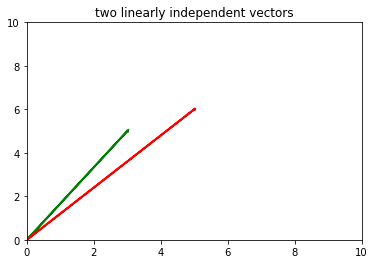

In [0]:
# Plotting two linearly independent vectors


# Axis Bounds
plt.xlim(0,10)          
plt.ylim(0,10)

# Original Vectors

vector_c = [3, 5]
vector_d = [5, 6]

# Plot Vectors and L

plt.arrow(0, 0, vector_c[0], vector_c[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, vector_d[0], vector_d[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')

plt.title("two linearly independent vectors")
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

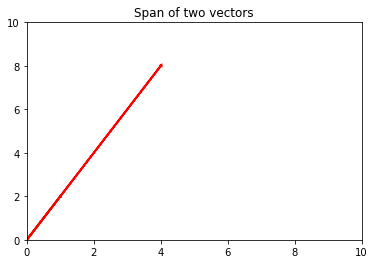

In [0]:
#The span is the set of all possible vectors that can be created with a linear combination of two vectors.


# Axis Bounds
plt.xlim(0,10)          
plt.ylim(0,10)

# Original Vectors

vector_e = [1, 2]
vector_f = [4, 8]

# Plot Vectors and L

plt.arrow(0, 0, vector_e[0], vector_e[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, vector_f[0], vector_f[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')

plt.title("Span of two vectors")
plt.show()

In [0]:
# The above two vectors are linearly dependent, they line on the same line. vector h is vector g scaled by 4.
# The span of two linearly dependent vectors is is the line that they lie on.


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# These are 3 dimensional vectors, so we have to use Axes3D


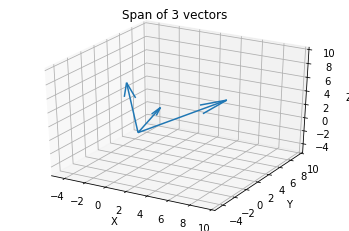

In [0]:
from mpl_toolkits.mplot3d import Axes3D


yellow = [1, 2, 3]
red = [-1, 0, 7]
blue = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
ax.set_zlim([-5, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Span of 3 vectors')
plt.show()

In [0]:
#The span of {l,m,n} is the set of all possible vectors that can be created in the 3 dimensional space within these 3 vectors.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# The Rank of a matrix is the dimension of the vector space spanned by its columns.
# R2 = A matrix with rank = 2.
# A vector with a rank 2 or R2 has two axes, x and y or two dimensions.

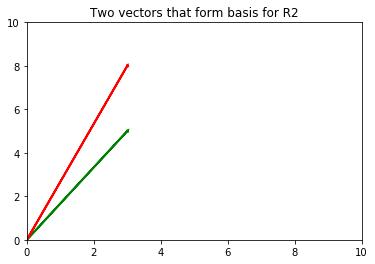

In [0]:
# Axis Bounds
plt.xlim(0,10)          
plt.ylim(0,10)

# Original Vectors
vector_g = [3, 5]
vector_h = [3, 8]



# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors
plt.arrow(0, 0, vector_g[0], vector_g[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, vector_h[0], vector_h[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')

plt.title("Two vectors that form basis for R2")
plt.show()

## 6.2 What does it mean to form a basis?

In [0]:
#The basis of a vector space  V  is a set of vectors that are linearly independent and that span the vector space  V .

# A set of vectors spans a space if their linear combinations fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
#Rank of the matrix is found by Gaussian elimination to reduce the matrix to Row Echelon form.

# A matrix is in Row-Echelon form when it has a 1 as its leading entry (furthest left) in each row, and zeroes at every position below that main entry.

In [0]:
# Step 1: Add 2 times the 1st row to the 2nd row.
# first row is (1, 2, 3), now second row is (1, 4, 13),, third row is (4, 8, 2).


In [0]:
#Step 2: Add -3 times the 1st row to the 3rd row
# # first row is (1, 2, 3), second row is (1, 4, 13), now third row is (1, 2, 4)

In [0]:
#Step 3: Multiply the new 2nd row by -1/3
# -1/3(1, 4, 13)
## first row is (1, 2, 3), now second row is (-1/3, -4/3, -13/3), third row is (1, 2, 4)


In [0]:
#Step 4: Add -3 times the 2nd row to the 3rd row.
# first row is (1, 2, 3), second row is (-1/3, -4/3, -13/3), third row is (0, -2, -9)
P = ([1, 2, 3],
     [-1/3, -4/3, -13/3],
     [0, -2, -9])
P

#The resulting matrix after Gaussian elimination is given below.

([1, 2, 3],
 [-0.3333333333333333, -1.3333333333333333, -4.333333333333333],
 [0, -2, -9])

In [0]:
# Since the resulting matrix after Gaussian elimination has one 1 value in the first spot of each row, its rank is 1, though the matrix has 3 rows and 3 columns.

## 7.2 What does the rank of a matrix tell us?

In [0]:
#The rank of a matrix tells us the dimension of the vector spanned byt its columns.
# Just because the matrix has a number of rows and columns does not mean that it can span that space.
# There may be a redundancy within the rows and columns of a matrix (linear dependence that becomes apparent when we reduce the matrix to a row-echelon form using Gaussian elimination).
# For example, the matrix in the above example can span only R, one axis. R2 is two axes, x and y.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Projection of vector w is the length of the shadow of vector w on line L.
# A projection onto an axis is the same as just setting the variable that doesn't match the axis to 0.
#Projection of vector w on line L is 2.

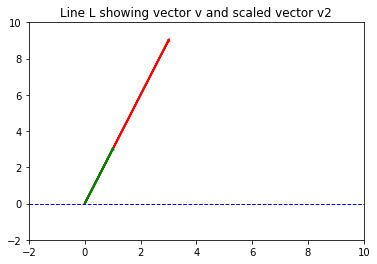

In [0]:
# Plot line L and vector v


# Axis Bounds
plt.xlim(-2,10)          
plt.ylim(-2,10)

# Original Vector
vector_v = [1,3] 

# Scaled Vector v2
v2 = np.multiply(3, vector_v)


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_v[0], vector_v[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')

plt.title("Line L showing vector v and scaled vector v2")
plt.show()

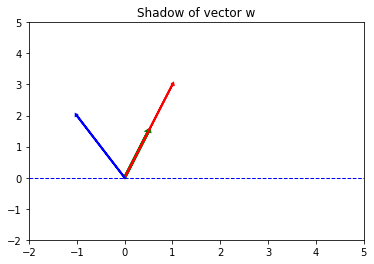

In [0]:
# Projecting vector w on line L

# Axis Bounds
plt.xlim(-2,5)          
plt.ylim(-2,5)

# Original Vector
vector_v = np.array([1,3]) 
vector_w = np.array([-1,2])
proj = np.dot(vector_v,vector_w)/np.dot(vector_v,vector_v)*vector_v 

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, vector_v[0], vector_v[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, vector_w[0], vector_w[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')

plt.title("Shadow of vector w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

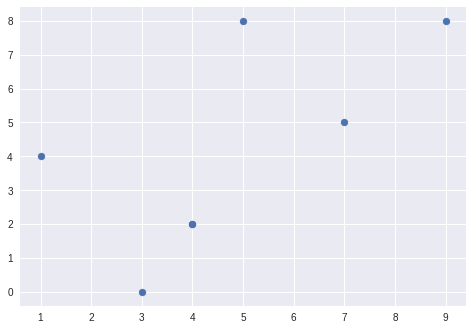

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()